# Preparación proyecto

## Librerías

In [1]:
# Python
import pandas as pd 
import numpy as np
from scipy.stats import trim_mean
from numpy import mean, absolute 
import seaborn as sns
import statistics
import matplotlib.pyplot as plt
import prince # for multiple correspondence analysis
from sklearn.feature_selection import SelectKBest, chi2 # for chi-squared feature selection
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from datetime import datetime

## Datos Mas Familias Accion

In [2]:
data = pd.read_csv("/datasets/csv-familias/Beneficiarios_M_s_Familias_en_Acci_n.csv")

/shared-libs/python3.9/py-core/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3135: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Datos Indice Desarrollo Humano departamental

In [4]:
idh = pd.read_csv('/datasets/csv-familias/idh_dep.csv')
idh['IDH'] = idh['IDH'].str.replace(',','.').astype('float')

### Estandariza texto

In [5]:
idh['Departamento'] = idh['Departamento'].str.replace('á','a')
idh['Departamento'] = idh['Departamento'].str.replace('é','e')
idh['Departamento'] = idh['Departamento'].str.replace('í','i')
idh['Departamento'] = idh['Departamento'].str.replace('ó','o')
idh['Departamento'] = idh['Departamento'].str.replace('ú','u')
idh['Departamento'] = idh['Departamento'].apply(lambda x: x.strip())
idh['Departamento'] = idh['Departamento'].apply(lambda x: str.upper(x))
idh['Departamento'] = idh['Departamento'].str.replace('SAN ANDRES Y PROVIDENCIA','SAN ANDRES')
idh['Departamento'] = idh['Departamento'].str.replace('VALLE DEL CAUCA','VALLE')

### Binning IDH

In [6]:
idh['rango_idh'] = pd.cut(idh['IDH'],4)
idh

,Departamento,IDH,rango_idh
0,BOGOTA,0.813,"(0.77, 0.813]"
1,VALLE,0.791,"(0.77, 0.813]"
2,SAN ANDRES,0.789,"(0.77, 0.813]"
3,ATLANTICO,0.786,"(0.77, 0.813]"
4,QUINDIO,0.784,"(0.77, 0.813]"
5,CALDAS,0.778,"(0.77, 0.813]"
6,META,0.778,"(0.77, 0.813]"
7,SANTANDER,0.778,"(0.77, 0.813]"
8,CUNDINAMARCA,0.774,"(0.77, 0.813]"
9,ANTIOQUIA,0.772,"(0.77, 0.813]"


## Unión MFA y IDH

Todos los valores quedan con IDH asociado al departamento correspondiente.

In [7]:
data = data.merge(idh,left_on= 'NombreDepartamentoAtencion',right_on= 'Departamento',how = 'left').drop(columns='Departamento')
data.head()

,Bancarizado,CodigoDepartamentoAtencion,CodigoMunicipioAtencion,Discapacidad,EstadoBeneficiario,Etnia,FechaInscripcionBeneficiario,Genero,NivelEscolaridad,NombreDepartamentoAtencion,...,TipoDocumento,TipoPoblacion,RangoBeneficioConsolidadoAsignado,RangoUltimoBeneficioAsignado,FechaUltimoBeneficioAsignado,RangoEdad,Titular,CantidadDeBeneficiarios,IDH,rango_idh
0,SI,8,8421,NO,ACTIVO,AFROCOLOMBIANO – NEGRO,2012-12-01,Hombre,ND,ATLANTICO,...,CC,UNIDOS,4.500.001 - 6.000.000,0 - 1.300.000,2018-01-01,30-49,SI,1,0.786,"(0.77, 0.813]"
1,ND,44,44847,ND,ACTIVO,INDIGENA,2013-02-01,Hombre,ND,LA GUAJIRA,...,TI,INDIGENAS,0 - 1.500.000,0 - 1.300.000,1900-01-01,06-17,NO,7,0.695,"(0.682, 0.726]"
2,SI,8,8421,NO,ACTIVO,AFROCOLOMBIANO – NEGRO,2012-12-01,Hombre,ND,ATLANTICO,...,CC,UNIDOS,4.500.001 - 6.000.000,0 - 1.300.000,2018-01-01,30-49,SI,1,0.786,"(0.77, 0.813]"
3,SI,8,8421,NO,ACTIVO,AFROCOLOMBIANO – NEGRO,2012-12-01,Hombre,ND,ATLANTICO,...,CC,UNIDOS,4.500.001 - 6.000.000,0 - 1.300.000,2018-01-01,30-49,SI,1,0.786,"(0.77, 0.813]"
4,SI,8,8421,NO,ACTIVO,AFROCOLOMBIANO – NEGRO,2012-12-01,Hombre,ND,ATLANTICO,...,CC,UNIDOS,4.500.001 - 6.000.000,0 - 1.300.000,2018-01-01,30-49,SI,1,0.786,"(0.77, 0.813]"


In [8]:
data[pd.isnull(data.IDH)==True]

,Bancarizado,CodigoDepartamentoAtencion,CodigoMunicipioAtencion,Discapacidad,EstadoBeneficiario,Etnia,FechaInscripcionBeneficiario,Genero,NivelEscolaridad,NombreDepartamentoAtencion,...,TipoDocumento,TipoPoblacion,RangoBeneficioConsolidadoAsignado,RangoUltimoBeneficioAsignado,FechaUltimoBeneficioAsignado,RangoEdad,Titular,CantidadDeBeneficiarios,IDH,rango_idh


In [9]:
data['NombreDepartamentoAtencion'].unique()

array(['ATLANTICO', 'LA GUAJIRA', 'VALLE', 'ANTIOQUIA', 'TOLIMA',
       'GUAVIARE', 'CASANARE', 'CORDOBA', 'NARIÑO', 'CUNDINAMARCA',
       'QUINDIO', 'BOLIVAR', 'SUCRE', 'CALDAS', 'CAUCA', 'ARAUCA',
       'GUAINIA', 'HUILA', 'BOYACA', 'CAQUETA', 'MAGDALENA', 'PUTUMAYO',
       'NORTE DE SANTANDER', 'RISARALDA', 'CESAR', 'CHOCO', 'BOGOTA',
       'SANTANDER', 'META', 'SAN ANDRES', 'AMAZONAS', 'VICHADA', 'VAUPES'],
      dtype=object)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3981375 entries, 0 to 3981374
Data columns (total 24 columns):
 #   Column                             Dtype   
---  ------                             -----   
 0   Bancarizado                        object  
 1   CodigoDepartamentoAtencion         int64   
 2   CodigoMunicipioAtencion            int64   
 3   Discapacidad                       object  
 4   EstadoBeneficiario                 object  
 5   Etnia                              object  
 6   FechaInscripcionBeneficiario       object  
 7   Genero                             object  
 8   NivelEscolaridad                   object  
 9   NombreDepartamentoAtencion         object  
 10  NombreMunicipioAtencion            object  
 11  Pais                               object  
 12  TipoAsignacionBeneficio            object  
 13  TipoBeneficio                      object  
 14  TipoDocumento                      object  
 15  TipoPoblacion                      object  
 16  

# Ajustes de columnas del conjunto de datos, preprocesamiento inicial

### Conversión tipo float CantidadDeBeneficiarios

In [ ]:
data.CantidadDeBeneficiarios = data.CantidadDeBeneficiarios.str.replace(',','')
data.CantidadDeBeneficiarios = data.CantidadDeBeneficiarios.astype(float)

# Remueven datos sin cantidad de beneficiarios.
data.dropna(subset=['CantidadDeBeneficiarios'],inplace = True)

## Datos faltantes

Los datos ND representan 'No Definido' y se reemplazan por NaN para poder aprovechar funciones del DataFrame

In [11]:
data = data.replace('ND',np.NaN)

print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))

print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isna().sum()))

Number of instances = 2179135
Number of attributes = 24
Number of missing values:
	Bancarizado: 120311
	CodigoDepartamentoAtencion: 0
	CodigoMunicipioAtencion: 0
	Discapacidad: 56848
	EstadoBeneficiario: 0
	Etnia: 1926938
	FechaInscripcionBeneficiario: 0
	Genero: 315
	NivelEscolaridad: 1942713
	NombreDepartamentoAtencion: 0
	NombreMunicipioAtencion: 0
	Pais: 2053871
	TipoAsignacionBeneficio: 542287
	TipoBeneficio: 1571929
	TipoDocumento: 0
	TipoPoblacion: 93264
	RangoBeneficioConsolidadoAsignado: 0
	RangoUltimoBeneficioAsignado: 0
	FechaUltimoBeneficioAsignado: 0
	RangoEdad: 0
	Titular: 0
	CantidadDeBeneficiarios: 0
	IDH: 0
	rango_idh: 0


## Conversión tipo fecha

### FechaInscripcionBeneficiario y FechaUltimoBeneficioAsignado

In [12]:
data['FechaInscripcionBeneficiario'] = pd.to_datetime(data['FechaInscripcionBeneficiario'],format="%Y/%m/%d")
data['FechaUltimoBeneficioAsignado'] = pd.to_datetime(data['FechaUltimoBeneficioAsignado'],format="%Y/%m/%d")

### Reemplazar nulos en fechas

Remover los nulos en fechas, que tiene  valor default '1900-01-01', uno reemplazo con nulos, ya que es la fecha de ultima asignación de beneficio, si lo reemplazamos por una moda o una media, podría generar incongruencias como que el beneficio asginado, sea menor que el ultimo recibido, el otro si aplicamos un replace por la moda.

In [13]:
nulo_date = datetime.strptime('1900-01-01 00:00:00', '%Y-%m-%d %H:%M:%S')
data['FechaUltimoBeneficioAsignado'].replace(nulo_date,np.nan,inplace=True)
data['FechaInscripcionBeneficiario'].replace(nulo_date,statistics.mode(data['FechaInscripcionBeneficiario']),inplace=True)

## Agrupación de valores similares

### Etnia

In [14]:
data.Etnia = data.Etnia.str.replace('^AFRO.*', 'AFROCOLOMBIANO', regex=True)
data.Etnia = data.Etnia.str.replace('ROM O GITANO', 'ROM', regex=True)

In [15]:
data.Etnia.unique()

array(['AFROCOLOMBIANO', 'INDIGENA', nan, 'MESTIZO', 'RAIZAL',
       'PALENQUERO', 'ROM'], dtype=object)

### Pais

In [16]:
data.Pais = data.Pais.str.replace('^C.*', 'Colombia', regex=True)
data.Pais = data.Pais.str.replace('^\d.*', 'Colombia', regex=True)

## Eliminación columnas sin valor informativo

### Pais y TipoAsignacionBeneficio

In [17]:
data.Pais.unique()

array([nan, 'Colombia'], dtype=object)

In [18]:
data.TipoAsignacionBeneficio.unique()

array(['MONETARIO', nan], dtype=object)

In [19]:
data.drop('Pais', axis=1, inplace=True)
data.drop('TipoAsignacionBeneficio', axis=1, inplace=True)

## Unión columnas de mismo valor informativo

### CodigoDepartamentoAtencion y NombreDepartamentoAtencion

In [20]:
data.CodigoDepartamentoAtencion = data.CodigoDepartamentoAtencion.astype(str)

In [21]:
data['DepartamentoAtencion'] = data['CodigoDepartamentoAtencion'] +" - "+ data['NombreDepartamentoAtencion']

In [22]:
data['DepartamentoAtencion']

0            8 - ATLANTICO
1          44 - LA GUAJIRA
2            8 - ATLANTICO
3            8 - ATLANTICO
4            8 - ATLANTICO
                ...       
3981370     47 - MAGDALENA
3981371          50 - META
3981372     47 - MAGDALENA
3981373       23 - CORDOBA
3981374        52 - NARIÑO
Name: DepartamentoAtencion, Length: 2179135, dtype: object

In [23]:
data.drop('CodigoDepartamentoAtencion', axis=1, inplace=True)
data.drop('NombreDepartamentoAtencion', axis=1, inplace=True)

### CodigoMunicipioAtencion y NombreMunicipioAtencion

In [24]:
data.CodigoMunicipioAtencion = data.CodigoMunicipioAtencion.astype(str)

In [25]:
data['MunicipioAtencion'] = data['CodigoMunicipioAtencion'] +" - "+ data['NombreMunicipioAtencion']

In [26]:
data['MunicipioAtencion']

0                        8421 - LURUACO
1                        44847 - URIBIA
2                        8421 - LURUACO
3                        8421 - LURUACO
4                        8421 - LURUACO
                       ...             
3981370                47268 - EL RETEN
3981371             50251 - EL CASTILLO
3981372             47001 - SANTA MARTA
3981373               23807 - TIERRALTA
3981374    52835 - SAN ANDRES DE TUMACO
Name: MunicipioAtencion, Length: 2179135, dtype: object

In [27]:
data.drop('CodigoMunicipioAtencion', axis=1, inplace=True)
data.drop('NombreMunicipioAtencion', axis=1, inplace=True)

## Conversión tipo category

La mayoría de las columnas son registros categóricos por lo que se convierten de una vez para beneficio computacional

In [28]:
data.nunique()

Bancarizado                             2
Discapacidad                            2
EstadoBeneficiario                      3
Etnia                                   6
FechaInscripcionBeneficiario           75
Genero                                  2
NivelEscolaridad                        8
TipoBeneficio                           9
TipoDocumento                           5
TipoPoblacion                           5
RangoBeneficioConsolidadoAsignado       5
RangoUltimoBeneficioAsignado            3
FechaUltimoBeneficioAsignado            6
RangoEdad                               6
Titular                                 2
CantidadDeBeneficiarios              1172
IDH                                    27
rango_idh                               4
DepartamentoAtencion                   33
MunicipioAtencion                    1110
dtype: int64

In [29]:
data.Bancarizado = data.Bancarizado.astype('category')
data.Discapacidad = data.Discapacidad.astype('category')
data.EstadoBeneficiario = data.EstadoBeneficiario.astype('category')
data.Etnia = data.Etnia.astype('category')
data.Genero = data.Genero.astype('category')
data.NivelEscolaridad = data.NivelEscolaridad.astype('category')
data.TipoBeneficio = data.TipoBeneficio.astype('category')
data.TipoDocumento = data.TipoDocumento.astype('category')
data.TipoPoblacion = data.TipoPoblacion.astype('category')
data.RangoBeneficioConsolidadoAsignado = data.RangoBeneficioConsolidadoAsignado.astype('category')
data.RangoUltimoBeneficioAsignado = data.RangoUltimoBeneficioAsignado.astype('category')
data.RangoEdad = data.RangoEdad.astype('category')
data.Titular = data.Titular.astype('category')

## Datos duplicados

In [30]:
dups = data[data.duplicated()==True]
dups

,Bancarizado,Discapacidad,EstadoBeneficiario,Etnia,FechaInscripcionBeneficiario,Genero,NivelEscolaridad,TipoBeneficio,TipoDocumento,TipoPoblacion,RangoBeneficioConsolidadoAsignado,RangoUltimoBeneficioAsignado,FechaUltimoBeneficioAsignado,RangoEdad,Titular,CantidadDeBeneficiarios,IDH,rango_idh,DepartamentoAtencion,MunicipioAtencion
2,SI,NO,ACTIVO,AFROCOLOMBIANO,2012-12-01,Hombre,NaN,NaN,CC,UNIDOS,4.500.001 - 6.000.000,0 - 1.300.000,2018-01-01,30-49,SI,1.0,0.786,"(0.77, 0.813]",8 - ATLANTICO,8421 - LURUACO
3,SI,NO,ACTIVO,AFROCOLOMBIANO,2012-12-01,Hombre,NaN,NaN,CC,UNIDOS,4.500.001 - 6.000.000,0 - 1.300.000,2018-01-01,30-49,SI,1.0,0.786,"(0.77, 0.813]",8 - ATLANTICO,8421 - LURUACO
4,SI,NO,ACTIVO,AFROCOLOMBIANO,2012-12-01,Hombre,NaN,NaN,CC,UNIDOS,4.500.001 - 6.000.000,0 - 1.300.000,2018-01-01,30-49,SI,1.0,0.786,"(0.77, 0.813]",8 - ATLANTICO,8421 - LURUACO
22,NO,NO,NO ACTIVO,NaN,2012-12-01,Mujer,NaN,NaN,CC,NaN,1.500.001 - 3.000.000,0 - 1.300.000,2014-01-01,30-49,SI,2.0,0.756,"(0.726, 0.77]",13 - BOLIVAR,13442 - MARIA LA BAJA
53,SI,NO,NO ACTIVO,NaN,2013-01-01,Mujer,NaN,NaN,CC,NaN,1.500.001 - 3.000.000,0 - 1.300.000,2014-01-01,30-49,SI,1.0,0.716,"(0.682, 0.726]",23 - CORDOBA,23574 - PUERTO ESCONDIDO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3981311,NaN,NaN,ACTIVO,NaN,2012-11-01,Mujer,NaN,NUTRICIÓN,CC,DESPLAZADOS,> 6.000.001,0 - 1.300.000,2018-01-01,30-49,SI,1.0,0.726,"(0.682, 0.726]",47 - MAGDALENA,47555 - PLATO
3981328,NaN,NaN,ACTIVO,NaN,2012-11-01,Mujer,NaN,NaN,CC,DESPLAZADOS,0 - 1.500.000,0 - 1.300.000,2018-01-01,50-65,SI,1.0,0.772,"(0.77, 0.813]",5 - ANTIOQUIA,5040 - ANORI
3981369,NaN,NaN,ACTIVO,NaN,2012-11-01,Mujer,NaN,NUTRICIÓN,CC,UNIDOS,4.500.001 - 6.000.000,0 - 1.300.000,2018-01-01,18-29,SI,1.0,0.726,"(0.682, 0.726]",47 - MAGDALENA,47268 - EL RETEN
3981370,NaN,NaN,ACTIVO,NaN,2012-11-01,Mujer,NaN,NUTRICIÓN,CC,UNIDOS,4.500.001 - 6.000.000,0 - 1.300.000,2018-01-01,18-29,SI,1.0,0.726,"(0.682, 0.726]",47 - MAGDALENA,47268 - EL RETEN


### Agrupación datos repetidos por CantidadDeBeneficiarios

In [31]:
data.columns

Index(['Bancarizado', 'Discapacidad', 'EstadoBeneficiario', 'Etnia',
       'FechaInscripcionBeneficiario', 'Genero', 'NivelEscolaridad',
       'TipoBeneficio', 'TipoDocumento', 'TipoPoblacion',
       'RangoBeneficioConsolidadoAsignado', 'RangoUltimoBeneficioAsignado',
       'FechaUltimoBeneficioAsignado', 'RangoEdad', 'Titular',
       'CantidadDeBeneficiarios', 'IDH', 'rango_idh', 'DepartamentoAtencion',
       'MunicipioAtencion'],
      dtype='object')

In [32]:
data = data.groupby(['Bancarizado', 'Discapacidad', 'EstadoBeneficiario', 'Etnia',
       'FechaInscripcionBeneficiario', 'Genero', 'NivelEscolaridad',
       'TipoBeneficio', 'TipoDocumento', 'TipoPoblacion',
       'RangoBeneficioConsolidadoAsignado', 'RangoUltimoBeneficioAsignado',
       'FechaUltimoBeneficioAsignado', 'RangoEdad', 'Titular',
       'IDH', 'rango_idh', 'DepartamentoAtencion',
       'MunicipioAtencion']).sum('CantidadDeBeneficiarios').reset_index()

KernelInterrupted: Execution interrupted by the Jupyter kernel.

In [ ]:
data.shape[0]

854663

# Análisis exploratorio del conjunto de datos

## Descripción del conjunto de datos

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2179135 entries, 0 to 3981374
Data columns (total 24 columns):
 #   Column                             Dtype   
---  ------                             -----   
 0   Bancarizado                        category
 1   CodigoDepartamentoAtencion         int64   
 2   CodigoMunicipioAtencion            int64   
 3   Discapacidad                       object  
 4   EstadoBeneficiario                 object  
 5   Etnia                              object  
 6   FechaInscripcionBeneficiario       object  
 7   Genero                             object  
 8   NivelEscolaridad                   object  
 9   NombreDepartamentoAtencion         object  
 10  NombreMunicipioAtencion            object  
 11  Pais                               object  
 12  TipoAsignacionBeneficio            object  
 13  TipoBeneficio                      object  
 14  TipoDocumento                      object  
 15  TipoPoblacion                      object  
 16  

In [ ]:
data.nunique()

Bancarizado                             2
Discapacidad                            2
EstadoBeneficiario                      3
Etnia                                   6
FechaInscripcionBeneficiario           75
Genero                                  2
NivelEscolaridad                        7
TipoBeneficio                           9
TipoDocumento                           5
TipoPoblacion                           5
RangoBeneficioConsolidadoAsignado       5
RangoUltimoBeneficioAsignado            3
FechaUltimoBeneficioAsignado            6
RangoEdad                               6
Titular                                 2
CantidadDeBeneficiarios              1254
IDH                                  3533
DepartamentoAtencion                   33
MunicipioAtencion                    1110
Rango_cant_ben                          2
dtype: int64

In [ ]:
print('Bancarizado:',data.Bancarizado.unique())
print('Discapacidad:',data.Discapacidad.unique())
print('EstadoBeneficiario:',data.EstadoBeneficiario.unique())
print('Etnia:',data.Etnia.unique())
print('Genero:',data.Genero.unique())
print('NivelEscolaridad:',data.NivelEscolaridad.unique())
print('TipoBeneficio:',data.TipoBeneficio.unique())
print('TipoDocumento:',data.TipoDocumento.unique())
print('TipoPoblacion:',data.TipoPoblacion.unique())
print('RangoBeneficioConsolidadoAsignado:',data.RangoBeneficioConsolidadoAsignado.unique())
print('RangoUltimoBeneficioAsignado:',data.RangoUltimoBeneficioAsignado.unique())
print('RangoEdad:',data.RangoEdad.unique())
print('Titular:',data.Titular.unique())
print('Rango_cant_ben:',data.Rango_cant_ben.unique())
print('rango_idh:',data.rango_idh.unique())

Banco: ['SI' 'ND' 'NO' nan]
Banco: ['SI' 'ND' 'NO' nan]
Banco: ['SI' 'ND' 'NO' nan]
Banco: ['SI' 'ND' 'NO' nan]
Banco: ['SI' 'ND' 'NO' nan]
Banco: ['SI' 'ND' 'NO' nan]
Banco: ['SI' 'ND' 'NO' nan]
Banco: ['SI' 'ND' 'NO' nan]
Banco: ['SI' 'ND' 'NO' nan]


In [ ]:
data.head()

,Bancarizado,Discapacidad,EstadoBeneficiario,Etnia,FechaInscripcionBeneficiario,Genero,NivelEscolaridad,TipoBeneficio,TipoDocumento,TipoPoblacion,RangoBeneficioConsolidadoAsignado,RangoUltimoBeneficioAsignado,FechaUltimoBeneficioAsignado,RangoEdad,Titular,CantidadDeBeneficiarios,IDH,DepartamentoAtencion,MunicipioAtencion,Rango_cant_ben
0,NaN,NaN,ACTIVO,AFROCOLOMBIANO,2012-10-01,Hombre,NaN,EDUCACIÓN PRIMARIA,TI,DESPLAZADOS,0 - 1.500.000,0 - 1.300.000,NaT,06-17,NO,1.0,0.772,5 - ANTIOQUIA,5001 - MEDELLIN,"(0.999, 3.0]"
1,NaN,NaN,ACTIVO,AFROCOLOMBIANO,2012-10-01,Mujer,NaN,NaN,CC,DESPLAZADOS,1.500.001 - 3.000.000,0 - 1.300.000,2018-01-01,50-65,SI,1.0,0.772,5 - ANTIOQUIA,5001 - MEDELLIN,"(0.999, 3.0]"
2,NaN,NaN,ACTIVO,AFROCOLOMBIANO,2013-01-01,Hombre,NaN,TRANSICIÓN,RC,UNIDOS,0 - 1.500.000,0 - 1.300.000,NaT,06-17,NO,1.0,0.772,5 - ANTIOQUIA,5001 - MEDELLIN,"(0.999, 3.0]"
3,NaN,NaN,ACTIVO,AFROCOLOMBIANO,2013-04-01,Mujer,NaN,NaN,TI,SISBEN,0 - 1.500.000,0 - 1.300.000,NaT,18-29,NO,1.0,0.772,5 - ANTIOQUIA,5001 - MEDELLIN,"(0.999, 3.0]"
4,NaN,NaN,ACTIVO,AFROCOLOMBIANO,2013-06-01,Mujer,NaN,NaN,CC,DESPLAZADOS,3.000.001 - 4.500.000,0 - 1.300.000,2018-01-01,30-49,SI,1.0,0.772,5 - ANTIOQUIA,5001 - MEDELLIN,"(0.999, 3.0]"


## Estadísticas Descriptivas

In [ ]:
data.describe()

## Estadísticas Multivariadas

## Gráficas

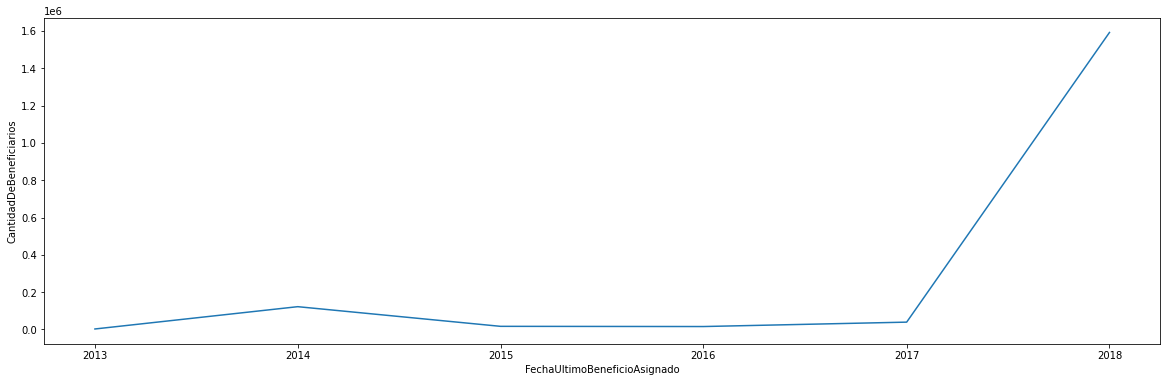

In [ ]:
fig, g = plt.subplots(figsize = (20,6))
d = data.groupby('FechaUltimoBeneficioAsignado').sum('CantidadDeBeneficiarios').reset_index()
g = sns.lineplot(x="FechaUltimoBeneficioAsignado", y="CantidadDeBeneficiarios", data=d, dashes=False, ax=g)

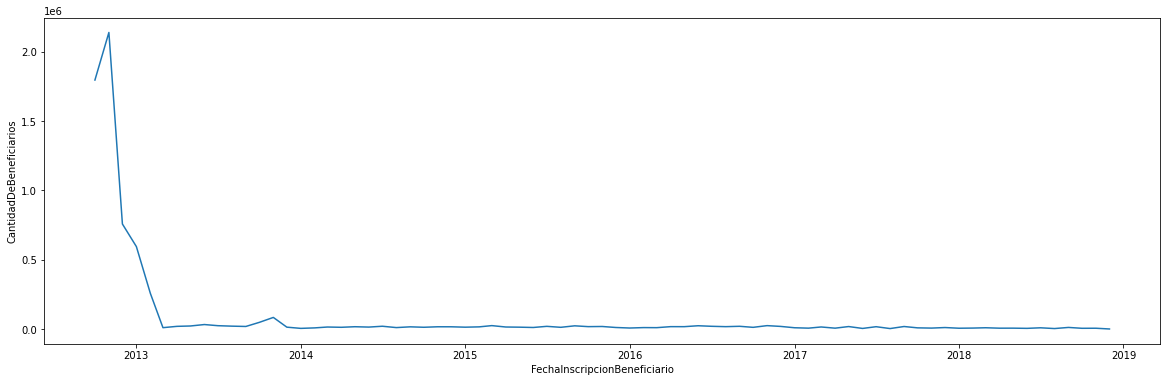

In [ ]:
fig, g = plt.subplots(figsize = (20,6))
d = data.groupby('FechaInscripcionBeneficiario').sum('CantidadDeBeneficiarios').reset_index()
g = sns.lineplot(x="FechaInscripcionBeneficiario", y="CantidadDeBeneficiarios", data=d, dashes=False, ax=g)


In [ ]:
data.Bancarizado.unique()

array(['ND', 'NO', 'SI'], dtype=object)

In [ ]:
total_beneficiarios = data['CantidadDeBeneficiarios'].sum()

In [ ]:
(data['CantidadDeBeneficiarios'].groupby(data["MunicipioAtencion"]).sum().sort_values()/total_beneficiarios).round(5)

MunicipioAtencion
91407 - LA PEDRERA          0.00000
27086 - BELEN DE BAJIRA     0.00000
91669 - PUERTO SANTANDER    0.00000
97889 - YAVARATE            0.00000
91263 - EL ENCANTO          0.00000
                             ...   
76001 - CALI                0.02039
13001 - CARTAGENA           0.02547
8001 - BARRANQUILLA         0.02563
5001 - MEDELLIN             0.03013
11001 - BOGOTA D.C.         0.04213
Name: CantidadDeBeneficiarios, Length: 1110, dtype: float64

In [ ]:
d= data.groupby('Etnia').sum('CantidadDeBeneficiarios').reset_index()
d[['Etnia','CantidadDeBeneficiarios']]


,Etnia,CantidadDeBeneficiarios
0,AFROCOLOMBIANO,255133.0
1,INDIGENA,377649.0
2,MESTIZO,8362.0
3,ND,5910421.0
4,PALENQUERO,1864.0
5,RAIZAL,2058.0
6,ROM,2698.0


In [ ]:
d= data.groupby('NivelEscolaridad').sum('CantidadDeBeneficiarios').reset_index()
d[['NivelEscolaridad','CantidadDeBeneficiarios']].sort_values(by='CantidadDeBeneficiarios',ascending=False)

,NivelEscolaridad,CantidadDeBeneficiarios
0,ND,4000988.0
4,SECUNDARIA,1249295.0
3,PRIMARIA,1165051.0
7,TRANSICION,142791.0
5,TECNICO,41.0
6,TECNOLOGO,16.0
1,POSGRADO,2.0
2,PREGRADO,1.0


In [ ]:
CrosstabResult=pd.crosstab(index=data['NivelEscolaridad'],columns=data['TipoBeneficio'],values=data["CantidadDeBeneficiarios"],aggfunc=sum)
#print(CrosstabResult)
#from scipy.stats import chi2_contingency
 
# Performing Chi-sq test
#ChiSqResult = chi2_contingency(CrosstabResult)
 
# P-Value is the Probability of H0 being True
# If P-Value&gt;0.05 then only we Accept the assumption(H0)
 
#print('The P-Value of the ChiSq Test is:', ChiSqResult[1])
CrosstabResult

TipoBeneficio,EDUCACIÓN PRIMARIA,EDUCACIÓN PRIMARIANUTRICIÓN,EDUCACIÓN PRIMARIANUTRICIÓN MENOR,EDUCACIÓN SECUNDARIA,EDUCACIÓN SECUNDARIANUTRICIÓN,ND,NUTRICIÓN,NUTRICIÓN MENOR,TRANSICIÓN,TRANSICIÓNNUTRICIÓN MENOR
NivelEscolaridad,,,,,,,,,,
ND,86362.0,6.0,10209.0,127370.0,163.0,3184986.0,280473.0,302383.0,2211.0,6825.0
POSGRADO,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN
PREGRADO,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
PRIMARIA,1117565.0,21.0,8735.0,67.0,NaN,36213.0,21.0,979.0,1040.0,410.0
SECUNDARIA,2212.0,NaN,NaN,1159610.0,557.0,86830.0,86.0,NaN,NaN,NaN
TECNICO,NaN,NaN,NaN,NaN,NaN,36.0,5.0,NaN,NaN,NaN
TECNOLOGO,NaN,NaN,NaN,NaN,NaN,13.0,3.0,NaN,NaN,NaN
TRANSICION,25.0,NaN,NaN,NaN,NaN,2238.0,NaN,2184.0,53804.0,84540.0


In [ ]:
relGenero = data.groupby('Genero').size() / data.shape[0] 
relEscola = data.groupby('NivelEscolaridad').size() / data.shape[0] 
relBancar = data.groupby('Bancarizado').size() / data.shape[0] 
relDiscap = data.groupby('Discapacidad').size() / data.shape[0] 
relEstado = data.groupby('EstadoBeneficiario').size() / data.shape[0] 
relEtnia = data.groupby('Etnia').size() / data.shape[0] 
relDepart = data.groupby('DepartamentoAtencion').size() / data.shape[0] 
relTipBen = data.groupby('TipoBeneficio').size() / data.shape[0] 
relTipDoc = data.groupby('TipoDocumento').size() / data.shape[0] 
relTipPob = data.groupby('TipoPoblacion').size() / data.shape[0] 
relRanCon = data.groupby('RangoBeneficioConsolidadoAsignado').size() / data.shape[0] 
relRanEdad = data.groupby('RangoEdad').size() / data.shape[0] 
relTitular = data.groupby('Titular').size() / data.shape[0] 

<AxesSubplot:ylabel='TipoPoblacion'>

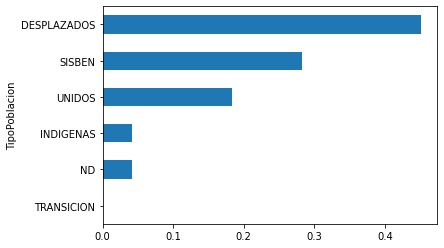

In [ ]:
relTipPob.sort_values().plot.barh()

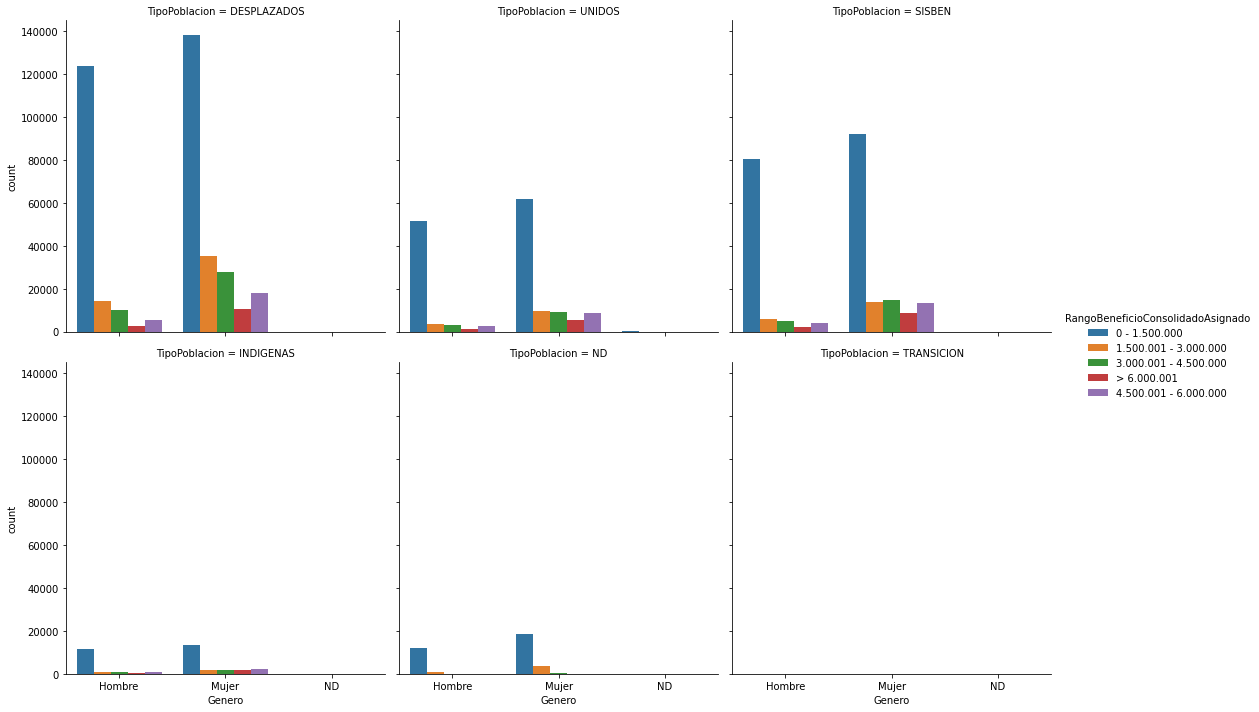

In [ ]:
g = sns.catplot(x="Genero", hue="RangoBeneficioConsolidadoAsignado", col="TipoPoblacion",
                data=data, kind="count", col_wrap=3);

In [ ]:
df2 = pd.pivot_table(data,index='TipoBeneficio',columns='RangoEdad',values="CantidadDeBeneficiarios",aggfunc=np.sum)

df2

RangoEdad,00-05,06-17,18-29,30-49,50-65,>65
TipoBeneficio,,,,,,
EDUCACIÓN PRIMARIA,7.0,1148228.0,57866.0,40.0,7.0,16.0
EDUCACIÓN PRIMARIANUTRICIÓN,NaN,NaN,27.0,NaN,NaN,NaN
EDUCACIÓN PRIMARIANUTRICIÓN MENOR,NaN,18936.0,6.0,2.0,NaN,NaN
EDUCACIÓN SECUNDARIA,10.0,357335.0,929611.0,53.0,7.0,31.0
EDUCACIÓN SECUNDARIANUTRICIÓN,NaN,1.0,715.0,3.0,NaN,1.0
ND,20936.0,308817.0,1509869.0,945283.0,447821.0,77592.0
NUTRICIÓN,3.0,112.0,50857.0,210313.0,16915.0,2389.0
NUTRICIÓN MENOR,38385.0,267124.0,23.0,11.0,NaN,3.0
TRANSICIÓN,NaN,57031.0,24.0,NaN,NaN,NaN


In [ ]:
df = pd.pivot_table(data,index='TipoBeneficio',columns='Genero',values="CantidadDeBeneficiarios",aggfunc=np.sum)

df

Genero,Hombre,Mujer,ND
TipoBeneficio,,,
EDUCACIÓN PRIMARIA,623200.0,582844.0,120.0
EDUCACIÓN PRIMARIANUTRICIÓN,NaN,27.0,NaN
EDUCACIÓN PRIMARIANUTRICIÓN MENOR,9082.0,9862.0,NaN
EDUCACIÓN SECUNDARIA,612020.0,675007.0,20.0
EDUCACIÓN SECUNDARIANUTRICIÓN,29.0,691.0,NaN
ND,1062253.0,2247924.0,141.0
NUTRICIÓN,40652.0,239921.0,16.0
NUTRICIÓN MENOR,154973.0,150563.0,10.0
TRANSICIÓN,30773.0,26276.0,6.0


In [ ]:
df = pd.pivot_table(data,index='RangoEdad',columns='NivelEscolaridad',values="CantidadDeBeneficiarios",aggfunc=np.sum)

df

NivelEscolaridad,ND,POSGRADO,PREGRADO,PRIMARIA,SECUNDARIA,TECNICO,TECNOLOGO,TRANSICION
RangoEdad,,,,,,,,
00-05,59341.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
06-17,612405.0,NaN,NaN,1134409.0,359761.0,NaN,NaN,142771.0
18-29,1629066.0,NaN,NaN,30493.0,889403.0,14.0,11.0,18.0
30-49,1155508.0,1.0,NaN,81.0,94.0,20.0,5.0,1.0
50-65,464661.0,1.0,1.0,54.0,28.0,5.0,NaN,1.0
>65,80007.0,NaN,NaN,14.0,9.0,2.0,NaN,NaN


In [ ]:
data.groupby('DepartamentoAtencion').sum('CantidadDeBeneficiarios').reset_index()[['DepartamentoAtencion','CantidadDeBeneficiarios']].sort_values(by='CantidadDeBeneficiarios')

,DepartamentoAtencion,CantidadDeBeneficiarios
31,97 - VAUPES,2667.0
32,99 - VICHADA,3370.0
29,94 - GUAINIA,5441.0
27,88 - SAN ANDRES,6095.0
28,91 - AMAZONAS,14791.0
30,95 - GUAVIARE,20700.0
17,63 - QUINDIO,46939.0
24,81 - ARAUCA,59009.0
25,85 - CASANARE,76596.0
26,86 - PUTUMAYO,82951.0


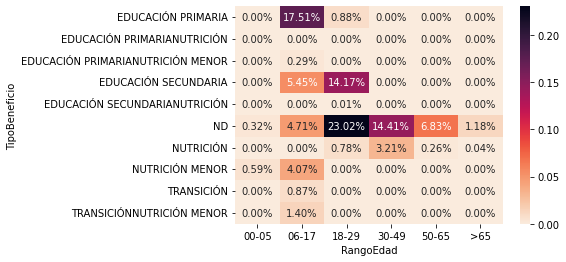

In [ ]:
cr=pd.crosstab(index=data['TipoBeneficio'],columns=data['RangoEdad'],values=data["CantidadDeBeneficiarios"],aggfunc=sum,normalize='all')
sns.heatmap(cr, cmap='rocket_r', annot=True, fmt='.2%');

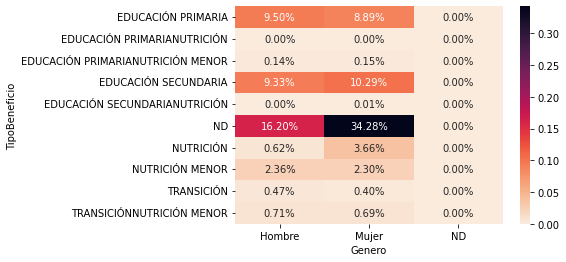

In [ ]:
cr=pd.crosstab(index=data['TipoBeneficio'],columns=data['Genero'],values=data["CantidadDeBeneficiarios"],aggfunc=sum,normalize='all')
sns.heatmap(cr, cmap='rocket_r', annot=True, fmt='.2%');

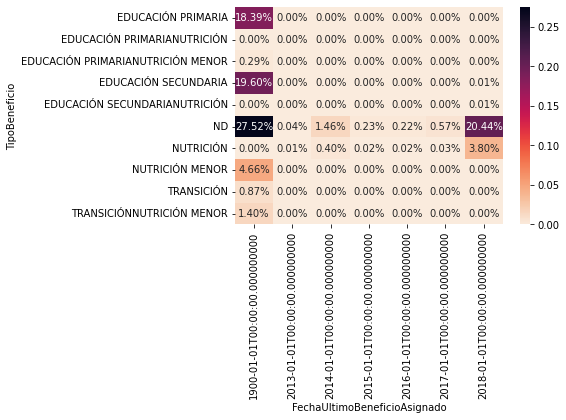

In [ ]:
cr=pd.crosstab(index=data['TipoBeneficio'],columns=data['FechaUltimoBeneficioAsignado'],values=data["CantidadDeBeneficiarios"],aggfunc=sum,normalize='all')
sns.heatmap(cr, cmap='rocket_r', annot=True, fmt='.2%');

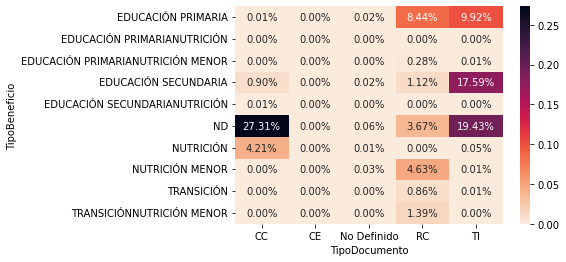

In [ ]:
cr=pd.crosstab(index=data['TipoBeneficio'],columns=data['TipoDocumento'],values=data["CantidadDeBeneficiarios"],aggfunc=sum,normalize='all')
sns.heatmap(cr, cmap='rocket_r', annot=True, fmt='.2%');

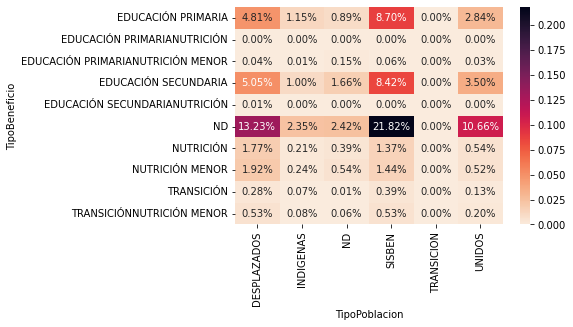

In [ ]:
cr=pd.crosstab(index=data['TipoBeneficio'],columns=data['TipoPoblacion'],values=data["CantidadDeBeneficiarios"],aggfunc=sum,normalize='all')
sns.heatmap(cr, cmap='rocket_r', annot=True, fmt='.2%');

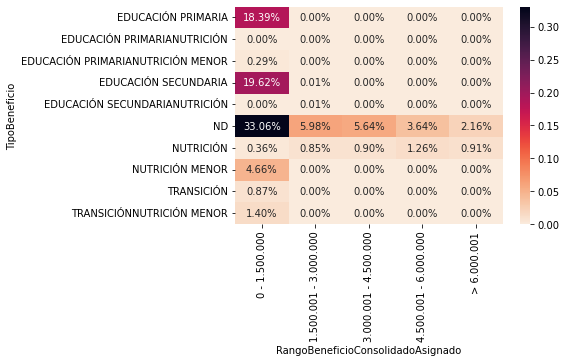

In [ ]:
cr=pd.crosstab(index=data['TipoBeneficio'],columns=data['RangoBeneficioConsolidadoAsignado'],values=data["CantidadDeBeneficiarios"],aggfunc=sum,normalize='all')
sns.heatmap(cr, cmap='rocket_r', annot=True, fmt='.2%');

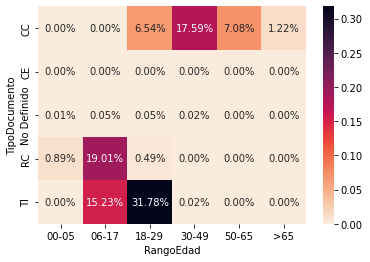

In [ ]:
cr=pd.crosstab(index=data['TipoDocumento'],columns=data['RangoEdad'],values=data["CantidadDeBeneficiarios"],aggfunc=sum,normalize='all')
sns.heatmap(cr, cmap='rocket_r', annot=True, fmt='.2%');

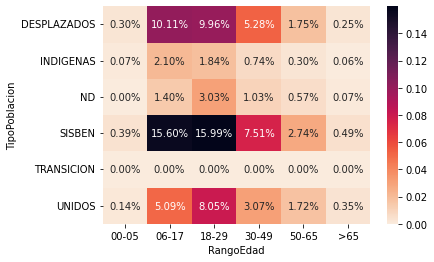

In [ ]:
cr=pd.crosstab(index=data['TipoPoblacion'],columns=data['RangoEdad'],values=data["CantidadDeBeneficiarios"],aggfunc=sum,normalize='all')
sns.heatmap(cr, cmap='rocket_r', annot=True, fmt='.2%');

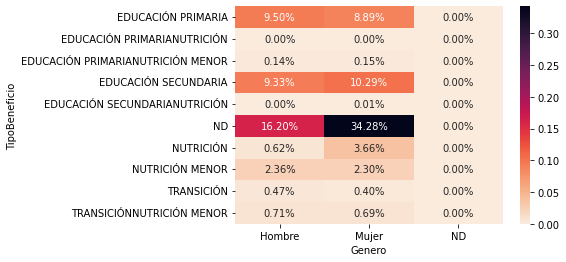

In [ ]:
cr=pd.crosstab(index=data['TipoBeneficio'],columns=data['Genero'],values=data["CantidadDeBeneficiarios"],aggfunc=sum,normalize='all')
sns.heatmap(cr, cmap='rocket_r', annot=True, fmt='.2%');

In [ ]:
df2 = pd.pivot_table(data,index='TipoBeneficio',columns='RangoEdad',values="CantidadDeBeneficiarios",aggfunc=np.sum)

print(df2)

RangoEdad                            00-05      06-17      18-29     30-49  \
TipoBeneficio                                                                
EDUCACIÓN PRIMARIA                     7.0  1148228.0    57866.0      40.0   
EDUCACIÓN PRIMARIANUTRICIÓN            NaN        NaN       27.0       NaN   
EDUCACIÓN PRIMARIANUTRICIÓN MENOR      NaN    18936.0        6.0       2.0   
EDUCACIÓN SECUNDARIA                  10.0   357335.0   929611.0      53.0   
EDUCACIÓN SECUNDARIANUTRICIÓN          NaN        1.0      715.0       3.0   
ND                                 20936.0   308817.0  1509869.0  945283.0   
NUTRICIÓN                              3.0      112.0    50857.0  210313.0   
NUTRICIÓN MENOR                    38385.0   267124.0       23.0      11.0   
TRANSICIÓN                             NaN    57031.0       24.0       NaN   
TRANSICIÓNNUTRICIÓN MENOR              NaN    91762.0        7.0       5.0   

RangoEdad                             50-65      >65  
TipoBene

In [ ]:
df = pd.pivot_table(data,index='TipoBeneficio',columns='Genero',values="CantidadDeBeneficiarios",aggfunc=np.sum)

df

Genero,Hombre,Mujer,ND
TipoBeneficio,,,
EDUCACIÓN PRIMARIA,623200.0,582844.0,120.0
EDUCACIÓN PRIMARIANUTRICIÓN,NaN,27.0,NaN
EDUCACIÓN PRIMARIANUTRICIÓN MENOR,9082.0,9862.0,NaN
EDUCACIÓN SECUNDARIA,612020.0,675007.0,20.0
EDUCACIÓN SECUNDARIANUTRICIÓN,29.0,691.0,NaN
ND,1062253.0,2247924.0,141.0
NUTRICIÓN,40652.0,239921.0,16.0
NUTRICIÓN MENOR,154973.0,150563.0,10.0
TRANSICIÓN,30773.0,26276.0,6.0


<AxesSubplot:ylabel='TipoBeneficio'>

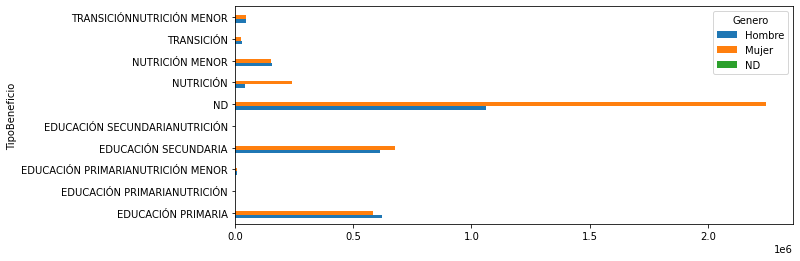

In [ ]:
df.plot.barh(figsize= (10,4))

In [ ]:
d= data.groupby('NivelEscolaridad').sum('CantidadDeBeneficiarios').reset_index()
d[['NivelEscolaridad','CantidadDeBeneficiarios']].sort_values(by='CantidadDeBeneficiarios',ascending=False)


,NivelEscolaridad,CantidadDeBeneficiarios
0,ND,4000988.0
4,SECUNDARIA,1249295.0
3,PRIMARIA,1165051.0
7,TRANSICION,142791.0
5,TECNICO,41.0
6,TECNOLOGO,16.0
1,POSGRADO,2.0
2,PREGRADO,1.0


In [ ]:
d= data.groupby('Etnia').sum('CantidadDeBeneficiarios').reset_index()
d[['Etnia','CantidadDeBeneficiarios']].sort_values(by='CantidadDeBeneficiarios',ascending=False)

,Etnia,CantidadDeBeneficiarios
3,ND,5910421.0
1,INDIGENA,377649.0
0,AFROCOLOMBIANO,255133.0
2,MESTIZO,8362.0
6,ROM,2698.0
5,RAIZAL,2058.0
4,PALENQUERO,1864.0


In [ ]:
data2=data[['Etnia','TipoPoblacion','CantidadDeBeneficiarios']]
data2['Etnia_agrup'] = data2['Etnia'].apply(lambda x: 'Si' if x != 'ND' else x)  
data2['Etnia']

/tmp/ipykernel_277/1032672416.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Etnia_agrup'] = data2['Etnia'].apply(lambda x: 'Si' if x != 'ND' else x)


0         AFROCOLOMBIANO
1         AFROCOLOMBIANO
2         AFROCOLOMBIANO
3         AFROCOLOMBIANO
4         AFROCOLOMBIANO
               ...      
854658                ND
854659                ND
854660                ND
854661                ND
854662                ND
Name: Etnia, Length: 854663, dtype: object

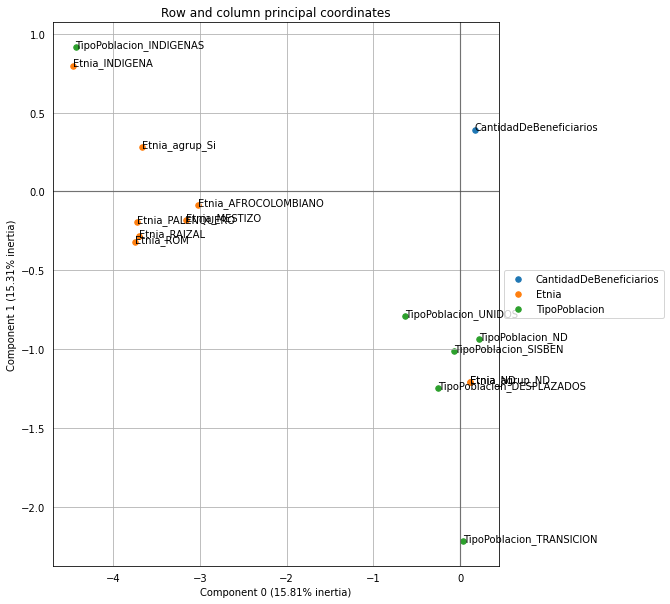

In [ ]:
mca = prince.MCA()        
churn_mca = mca.fit(data2)

ax = churn_mca.plot_coordinates(
        X=data2,
        ax=None,
        figsize=(8, 10),
        show_row_points=False,
        row_points_size=0,
        show_row_labels=False,
        show_column_points=True,
        column_points_size=30,
        show_column_labels=True,
        legend_n_cols=1
               ).legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Preprocesamiento basado en hallazgos

## Outliers

## Agregación

## Muestreo

## Discretización

### Binning CantidadDeBeneficiarios

In [ ]:
data['Rango_cant_ben'] = pd.qcut(data['CantidadDeBeneficiarios'],4,duplicates='drop')

,Bancarizado,Discapacidad,EstadoBeneficiario,Etnia,FechaInscripcionBeneficiario,Genero,NivelEscolaridad,TipoBeneficio,TipoDocumento,TipoPoblacion,RangoBeneficioConsolidadoAsignado,RangoUltimoBeneficioAsignado,FechaUltimoBeneficioAsignado,RangoEdad,Titular,CantidadDeBeneficiarios,IDH,DepartamentoAtencion,MunicipioAtencion,Rango_cant_ben
0,ND,ND,ACTIVO,AFROCOLOMBIANO,2012-10-01,Hombre,ND,EDUCACIÓN PRIMARIA,TI,DESPLAZADOS,0 - 1.500.000,0 - 1.300.000,1900-01-01,06-17,NO,1.0,0.772,5 - ANTIOQUIA,5001 - MEDELLIN,"(0.999, 3.0]"
1,ND,ND,ACTIVO,AFROCOLOMBIANO,2012-10-01,Mujer,ND,ND,CC,DESPLAZADOS,1.500.001 - 3.000.000,0 - 1.300.000,2018-01-01,50-65,SI,1.0,0.772,5 - ANTIOQUIA,5001 - MEDELLIN,"(0.999, 3.0]"
2,ND,ND,ACTIVO,AFROCOLOMBIANO,2013-01-01,Hombre,ND,TRANSICIÓN,RC,UNIDOS,0 - 1.500.000,0 - 1.300.000,1900-01-01,06-17,NO,1.0,0.772,5 - ANTIOQUIA,5001 - MEDELLIN,"(0.999, 3.0]"
3,ND,ND,ACTIVO,AFROCOLOMBIANO,2013-04-01,Mujer,ND,ND,TI,SISBEN,0 - 1.500.000,0 - 1.300.000,1900-01-01,18-29,NO,1.0,0.772,5 - ANTIOQUIA,5001 - MEDELLIN,"(0.999, 3.0]"
4,ND,ND,ACTIVO,AFROCOLOMBIANO,2013-06-01,Mujer,ND,ND,CC,DESPLAZADOS,3.000.001 - 4.500.000,0 - 1.300.000,2018-01-01,30-49,SI,1.0,0.772,5 - ANTIOQUIA,5001 - MEDELLIN,"(0.999, 3.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
854658,SI,NO,ACTIVO,ND,2015-02-01,Mujer,ND,ND,CC,DESPLAZADOS,1.500.001 - 3.000.000,0 - 1.300.000,2018-01-01,30-49,SI,1.0,0.754,99 - VICHADA,99773 - CUMARIBO,"(0.999, 3.0]"
854659,SI,NO,ACTIVO,ND,2015-04-01,Hombre,ND,ND,CC,DESPLAZADOS,3.000.001 - 4.500.000,0 - 1.300.000,2018-01-01,30-49,SI,1.0,0.754,99 - VICHADA,99773 - CUMARIBO,"(0.999, 3.0]"
854660,SI,NO,ACTIVO,ND,2015-07-01,Hombre,ND,ND,CC,DESPLAZADOS,1.500.001 - 3.000.000,0 - 1.300.000,2018-01-01,30-49,SI,1.0,0.754,99 - VICHADA,99773 - CUMARIBO,"(0.999, 3.0]"
854661,SI,NO,ACTIVO,ND,2015-08-01,Mujer,ND,NUTRICIÓN,CC,DESPLAZADOS,3.000.001 - 4.500.000,0 - 1.300.000,2018-01-01,30-49,SI,1.0,0.754,99 - VICHADA,99773 - CUMARIBO,"(0.999, 3.0]"


## Reducción de dimensionalidad

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c166f790-79e3-4b78-86ae-d8397ad8412c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>